# Pre-processing



# Packages

In [ ]:
!pip install ydata-profiling
!pip install fuzzywuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 10.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=8edde29c5fdf4a9a5763fb63a2398b1a3bcb16b84c481fee763eb7b67d87e54a
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import io
import numpy as np
import random
import seaborn as sns
from ydata_profiling import ProfileReport

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Idealista Dataset

In [ ]:
df_idealista = pd.read_csv('/content/drive/MyDrive/ML_Project/CSV/idealista_CSV/idealista_barcelona.csv') # load data

We will perform a basic inspection of the dataset. Find each variable type and recode it if necessary; find missing values; impute;look at histograms; check variability

## Brief investigation

In [ ]:
df_idealista.shape

(14351, 43)

In [ ]:
df_idealista.dtypes

Unnamed: 0                  int64
propertyCode                int64
thumbnail                  object
externalReference          object
numPhotos                   int64
floor                      object
price                     float64
priceInfo                  object
propertyType               object
operation                  object
size                      float64
exterior                   object
rooms                       int64
bathrooms                   int64
address                    object
province                   object
municipality               object
district                   object
country                    object
neighborhood               object
latitude                  float64
longitude                 float64
showAddress                  bool
url                        object
distance                    int64
description                object
hasVideo                     bool
status                     object
newDevelopment               bool
hasLift       

In [ ]:
df_idealista.describe()

,Unnamed: 0,propertyCode,numPhotos,price,size,rooms,bathrooms,latitude,longitude,distance,priceByArea
count,14351.000000,1.435100e+04,14351.000000,1.435100e+04,14351.000000,14351.000000,14351.000000,14351.000000,14351.000000,14351.000000,14351.000000
mean,1535.773396,1.026539e+08,29.541495,7.673770e+05,170.664316,3.124242,1.958888,41.397308,2.159693,1439.697721,5469.014076
std,1281.082510,4.795392e+06,14.502805,7.859614e+05,4841.390300,1.308495,1.046106,0.016953,0.022693,670.422002,2497.413038
min,0.000000,2.733485e+07,0.000000,2.750000e+04,14.000000,0.000000,0.000000,41.362596,2.107740,15.000000,1.000000
25%,512.000000,1.025615e+08,20.000000,3.185000e+05,75.000000,2.000000,1.000000,41.384369,2.142682,953.000000,3859.000000
50%,1085.000000,1.038508e+08,28.000000,5.250000e+05,102.000000,3.000000,2.000000,41.394772,2.158859,1394.000000,5045.000000
75%,2423.000000,1.043946e+08,38.000000,9.490000e+05,155.000000,4.000000,2.000000,41.406235,2.174054,1865.000000,6500.000000
max,4899.000000,1.047557e+08,120.000000,1.600000e+07,580000.000000,17.000000,9.000000,41.448227,2.227150,2998.000000,38554.000000


## Data Cleaning

We here performe a first cleaning of the dataset, deleting all the variables that are : non-informative, with zero variability, with high percentage of missing values and highly unbalanced. This is a first cleaning, but later on we will performe a more detailed feature selection.

### Variable cleaning analysis

Change format of the rows that were still in a dictionary format, due to an error of JSON to dataframe conversion.

In [ ]:
# Iterate over the rows of the DataFrame
for index, row in df_idealista.iterrows():
    # Try to convert the string representation of 'parkingSpace' to a dictionary
    try:
        parking_space_dict = eval(row['parkingSpace'])
    except Exception as e:
        # If conversion fails, set default values for parking space information
        parking_space_dict = {'hasParkingSpace': False, 'isParkingSpaceIncludedInPrice': False, 'parkingSpacePrice': 0.0}

    # Extract values from the 'parkingSpace' dictionary
    has_parking_space = parking_space_dict.get('hasParkingSpace', False)
    is_parking_space_included = parking_space_dict.get('isParkingSpaceIncludedInPrice', False)
    parking_space_price = parking_space_dict.get('parkingSpacePrice', 0.0)

    if has_parking_space:
      if not is_parking_space_included:
        df_idealista.at[index, 'price'] += parking_space_price

    df_idealista.at[index, 'hasParkingSpace'] = has_parking_space
    # Convert the hasLift column to boolean type
    df_idealista['hasParkingSpace'] = df_idealista['hasParkingSpace'].astype(bool)
    # df_idealista.at[index, 'isParkingSpaceIncludedInPrice'] = is_parking_space_included
    # df_idealista.at[index, 'parkingSpacePrice'] = parking_space_price

    # # Try to convert the string representation of 'detailedType' to a dictionary
    # try:
    #     detailed_type_dict = eval(row['detailedType'])
    # except Exception as e:
    #     # If conversion fails, set default values for property type and sub-type
    #     detailed_type_dict = {'typology': None, 'subTypology': None}

    # # Extract values from the 'detailedType' dictionary
    # df_idealista.at[index, 'propertySubType'] = detailed_type_dict.get('subTypology', None)

df_idealista.drop(columns=['priceInfo', 'parkingSpace', 'detailedType'], inplace=True)

Variables that are subsumed into other: `priceByArea` = price/area

#### Non-informative features: `Unnamed: 0`, `externalReference`, `thumbnail`, `url`,`distance`.

In [ ]:
df_idealista['Unnamed: 0'] # is the id of the extraction: not usful for the analysis

0          0
1          1
2          2
3          3
4          4
        ... 
14346    695
14347    696
14348    697
14349    698
14350    699
Name: Unnamed: 0, Length: 14351, dtype: int64

In [ ]:
df_idealista['externalReference']

0                     4491V
1              BCN070508440
2              BCN071648781
3              BCN072769183
4              BCN072088461
                ...        
14346                 A 897
14347                  3179
14348                283380
14349    VI-000-030-681-091
14350                  7125
Name: externalReference, Length: 14351, dtype: object

In [ ]:
df_idealista['thumbnail'].value_counts() #link to the image -> not usful

thumbnail
https://img3.idealista.com/blur/WEB_LISTING/0/id.pro.es.image.master/74/12/04/865564120.jpg     9
https://img3.idealista.com/blur/WEB_LISTING/0/id.pro.es.image.master/47/08/90/990392834.jpg     7
https://img3.idealista.com/blur/WEB_LISTING/0/id.pro.es.image.master/2a/9e/56/1144228905.jpg    6
https://img3.idealista.com/blur/WEB_LISTING/0/id.pro.es.image.master/5c/97/54/1126972384.jpg    6
https://img3.idealista.com/blur/WEB_LISTING/0/id.pro.es.image.master/2d/11/45/841549337.jpg     5
                                                                                               ..
https://img3.idealista.com/blur/WEB_LISTING/0/id.pro.es.image.master/bf/99/c5/1221570082.jpg    1
https://img3.idealista.com/blur/WEB_LISTING/0/id.pro.es.image.master/1a/83/f4/862518950.jpg     1
https://img3.idealista.com/blur/WEB_LISTING/0/id.pro.es.image.master/86/40/8b/1217428771.jpg    1
https://img3.idealista.com/blur/WEB_LISTING/0/id.pro.es.image.master/05/4c/29/1209590317.jpg    1
https://im

In [ ]:
df_idealista['url'].value_counts() # link to the url -> not usful

url
https://www.idealista.com/inmueble/102099840/    6
https://www.idealista.com/inmueble/104350001/    5
https://www.idealista.com/inmueble/99197469/     5
https://www.idealista.com/inmueble/102425013/    5
https://www.idealista.com/inmueble/88318517/     5
                                                ..
https://www.idealista.com/inmueble/103894033/    1
https://www.idealista.com/inmueble/104309631/    1
https://www.idealista.com/inmueble/103917434/    1
https://www.idealista.com/inmueble/104383287/    1
https://www.idealista.com/inmueble/103719505/    1
Name: count, Length: 9068, dtype: int64

In [ ]:
df_idealista['distance'] # variable that computes the distance from the origin point that we have stablished.

0        2080
1         577
2        1826
3        1697
4        1932
         ... 
14346    1088
14347     427
14348     801
14349     637
14350    1092
Name: distance, Length: 14351, dtype: int64

#### Zero-variability features: `operation`, `province`, `country`,`topNewDevelopment`.

In [ ]:
#table
df_idealista['operation'].value_counts()

operation
sale    14351
Name: count, dtype: int64

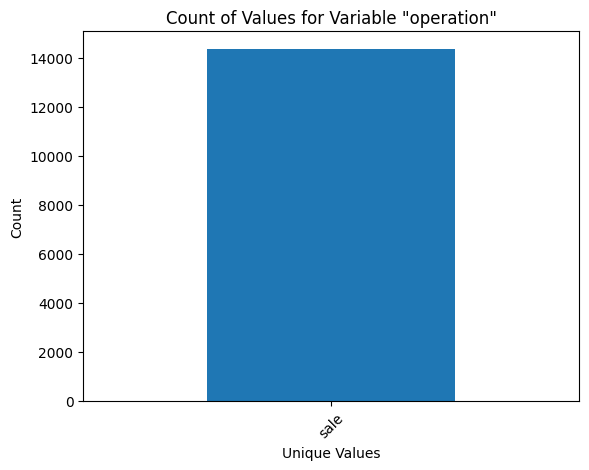

In [ ]:
#bar plot
df_idealista['operation'].value_counts().plot(kind='bar')
plt.title('Count of Values for Variable "operation"')
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
df_idealista['province'].value_counts()

province
Barcelona    14351
Name: count, dtype: int64

In [ ]:
df_idealista['country'].value_counts()

country
es    14351
Name: count, dtype: int64

In [ ]:
df_idealista['topNewDevelopment'].value_counts()

topNewDevelopment
False    14351
Name: count, dtype: int64

In [ ]:
## ????
df_idealista['suggestedTexts'].value_counts()

suggestedTexts
{'subtitle': "La Dreta de l'Eixample, Barcelona", 'title': 'Piso'}                                  315
{'subtitle': 'Sant Gervasi - Galvany, Barcelona', 'title': 'Piso'}                                  252
{'subtitle': "L'Antiga Esquerra de l'Eixample, Barcelona", 'title': 'Piso'}                         172
{'subtitle': 'Vila de Gràcia, Barcelona', 'title': 'Piso'}                                           97
{'subtitle': "La Nova Esquerra de l'Eixample, Barcelona", 'title': 'Piso'}                           94
                                                                                                   ... 
{'subtitle': 'Sarrià, Barcelona', 'title': 'Chalet pareado'}                                          1
{'subtitle': 'Pedralbes, Barcelona', 'title': "Casa independiente en calle de l'Abadessa Olzet"}      1
{'subtitle': 'Sants - Badal, Barcelona', 'title': 'Piso en calle de Munné, 11'}                       1
{'subtitle': 'Sants - Badal, Barcelona', 'title':

#### Features with high percentage of missing values: `newDevelopmentFinished`,`labels`.

In [ ]:
(df_idealista['newDevelopmentFinished'].isnull().sum() / len(df_idealista)) * 100


96.66225350149816

In [ ]:
(df_idealista['labels'].isnull().sum() / len(df_idealista)) * 100


86.23789282976796

#### Highly unbalanced features: `topPlus`,`newDevelopment`,`hasStaging`,`has3DTour`, `municipality`.

In [ ]:
df_idealista['topPlus'].value_counts(normalize=True) * 100

topPlus
False    97.839872
True      2.160128
Name: proportion, dtype: float64

In [ ]:
df_idealista['newDevelopment'].value_counts(normalize=True) * 100

newDevelopment
False    96.662254
True      3.337746
Name: proportion, dtype: float64

In [ ]:
df_idealista['hasStaging'].value_counts(normalize=True) * 100

hasStaging
False    96.06996
True      3.93004
Name: proportion, dtype: float64

In [ ]:
df_idealista['has3DTour'].value_counts(normalize=True) * 100

has3DTour
False    93.951641
True      6.048359
Name: proportion, dtype: float64

In [ ]:
#df_idealista['municipality'].value_counts()
df_idealista['municipality'].value_counts(normalize=True) * 100

municipality
Barcelona                  98.299770
Hospitalet de Llobregat     1.128841
Sant Adriá de Besós         0.571389
Name: proportion, dtype: float64

#### High variability categorical variable: `address`.

In [ ]:
pd.DataFrame(df_idealista['address'].value_counts())

,count
address,
barrio La Dreta de l'Eixample,362
barrio Sant Gervasi - Galvany,317
Gran Via de les Corts Catalanes,283
barrio L'Antiga Esquerra de l'Eixample,193
calle de Muntaner,148
...,...
valles,1
riera de Sant Andreu,1
Joan Guell,1


## Drop

In [ ]:
df_idealista.drop(columns=['Unnamed: 0', 'externalReference', 'thumbnail', 'url', 'operation', 'province', 'country', 'municipality', 'topNewDevelopment', 'suggestedTexts', 'labels', 'newDevelopmentFinished', 'highlight', 'topPlus', 'newDevelopment', 'hasStaging', 'hasPlan', 'has3DTour', 'has360', 'hasVideo', 'showAddress', 'distance', 'address','priceByArea', 'numPhotos'], inplace=True)

In [ ]:
# Find duplicates
duplicates = df_idealista[df_idealista.duplicated('propertyCode', keep='first')]

# Remove duplicates
df_idealista = df_idealista.drop_duplicates('propertyCode', keep='first')

## Missing values analysis

In [ ]:
(df_idealista.isnull().sum() / len(df_idealista)) * 100

propertyCode        0.000000
floor              10.211734
price               0.000000
propertyType        0.000000
size                0.000000
exterior           12.174680
rooms               0.000000
bathrooms           0.000000
district            0.000000
neighborhood        0.882223
latitude            0.000000
longitude           0.000000
description         0.297750
status              0.000000
hasLift             4.786061
hasParkingSpace     0.000000
dtype: float64

In [ ]:
# Iterate over each column in the DataFrame
for column in df_idealista.columns:
    # Filter out rows with NaN values for the current column
    nan_rows = df_idealista[df_idealista[column].isna()]

    # Print the variable name and rows with NaN values for that variable
    print(f"Variable: {column}")
    print(f"Rows with NaN values: {len(nan_rows)}")
    print(nan_rows)
    print()  # Print an empty line for clarity

Variable: propertyCode
Rows with NaN values: 0
Empty DataFrame
Columns: [propertyCode, floor, price, propertyType, size, exterior, rooms, bathrooms, district, neighborhood, latitude, longitude, description, status, hasLift, hasParkingSpace]
Index: []

Variable: floor
Rows with NaN values: 926
       propertyCode floor      price propertyType   size exterior  rooms  \
13        104404095   NaN  2580000.0       chalet  215.0      NaN      3   
21         99799824   NaN  2150000.0       chalet  291.0      NaN      5   
35        101853401   NaN   999000.0    penthouse  221.0     True      4   
52        102708712   NaN  1695000.0         flat  176.0     True      3   
55         99099866   NaN  1290000.0       chalet  334.0      NaN      5   
...             ...   ...        ...          ...    ...      ...    ...   
14247     104637480   NaN   275000.0         flat   87.0    False      4   
14252     104637484   NaN   275000.0         flat   79.0    False      4   
14254     104637483   

### Recoding variables, categorizing, dealing with missings

**neighborhood & district**

In [ ]:
missing_neighborhoods = df_idealista[df_idealista['neighborhood'].isnull()]

# Extract the districts associated with missing neighborhoods
districts_with_missing_neighborhoods = missing_neighborhoods['district'].unique()

print("Districts associated with missing neighborhoods:")
print(districts_with_missing_neighborhoods)

Districts associated with missing neighborhoods:
['La Mina' 'La Catalana' 'El Besós' 'La Verneda']


In [ ]:
df_idealista.loc[df_idealista['district'] == 'La Mina', 'neighborhood'] = 'El Besòs i el Maresme'
df_idealista.loc[df_idealista['district'] == 'El Besós', 'neighborhood'] = 'El Besòs i el Maresme'
df_idealista.loc[df_idealista['district'] == 'Collblanc', 'neighborhood'] = 'Sants - Badal'

df_idealista.loc[df_idealista['neighborhood'] == 'El Besòs', 'neighborhood'] = 'El Besòs i el Maresme'
df_idealista.loc[df_idealista['neighborhood'] == 'El Poble Sec - Parc de Montjuïc', 'neighborhood'] = 'El Poble Sec'

In [ ]:
df_idealista['district'].unique()

array(['Sarrià-Sant Gervasi', 'Eixample', 'Ciutat Vella', 'Les Corts',
       'Gràcia', 'Sants-Montjuïc', 'Horta Guinardó', 'Collblanc',
       'La Torrasa', 'Sant Martí', 'Sant Andreu', 'Nou Barris', 'La Mina',
       'La Catalana', 'El Besós', 'La Verneda', 'Santa Eulàlia'],
      dtype=object)

In [ ]:
df_idealista.loc[df_idealista['district'] == 'Collblanc', 'district'] = 'Sants-Montjuïc'
df_idealista.loc[df_idealista['district'] == 'La Mina', 'district'] = 'Sant Martí'
df_idealista.loc[df_idealista['district'] == 'El Besós', 'district'] = 'Sant Martí'

# Not a districts from Barcelona, so we will remove their rows
df_idealista = df_idealista[~df_idealista['district'].isin(['La Torrasa', 'La Catalana', 'La Verneda', 'Santa Eulàlia'])]

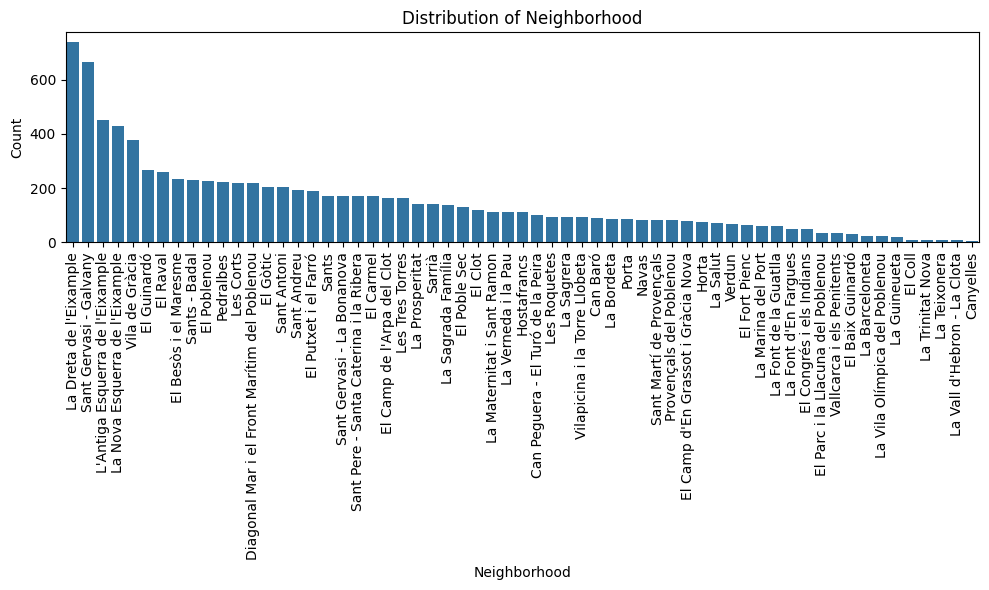

In [ ]:
plt.figure(figsize=(10, 6))  # Set the size of the plot
sns.countplot(data=df_idealista, x='neighborhood', order=df_idealista['neighborhood'].value_counts().index)
plt.title('Distribution of Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

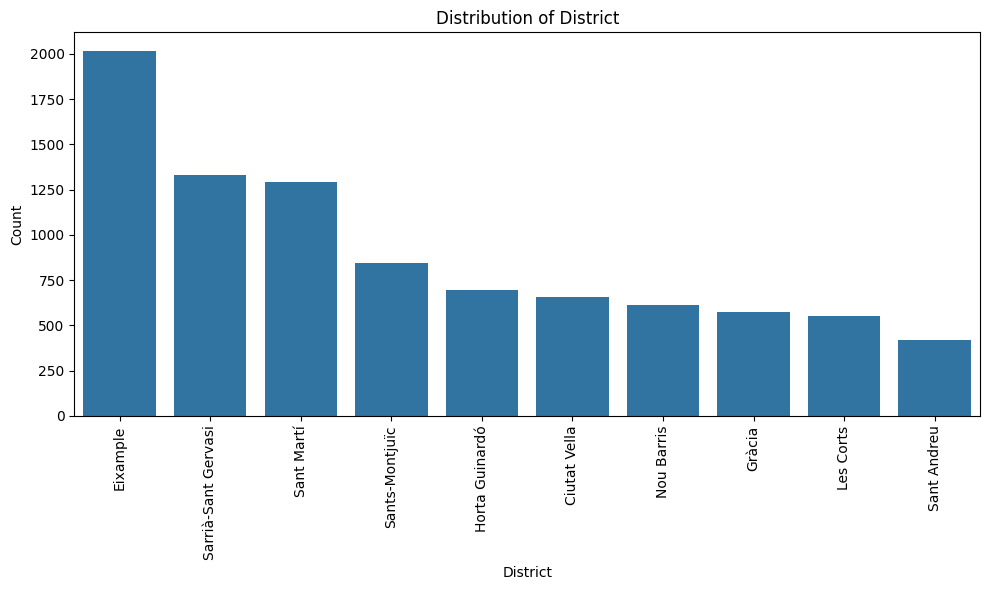

In [ ]:
plt.figure(figsize=(10, 6))  # Set the size of the plot
sns.countplot(data=df_idealista, x='district', order=df_idealista['district'].value_counts().index)
plt.title('Distribution of District')
plt.xlabel('District')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

As the neighborhood variable is very unbalanced, we will only use it for joining the distinct datasets. However, we will remove it at the end and preserve the district, longitude, and latitude information for geographical location.

**propertyType**

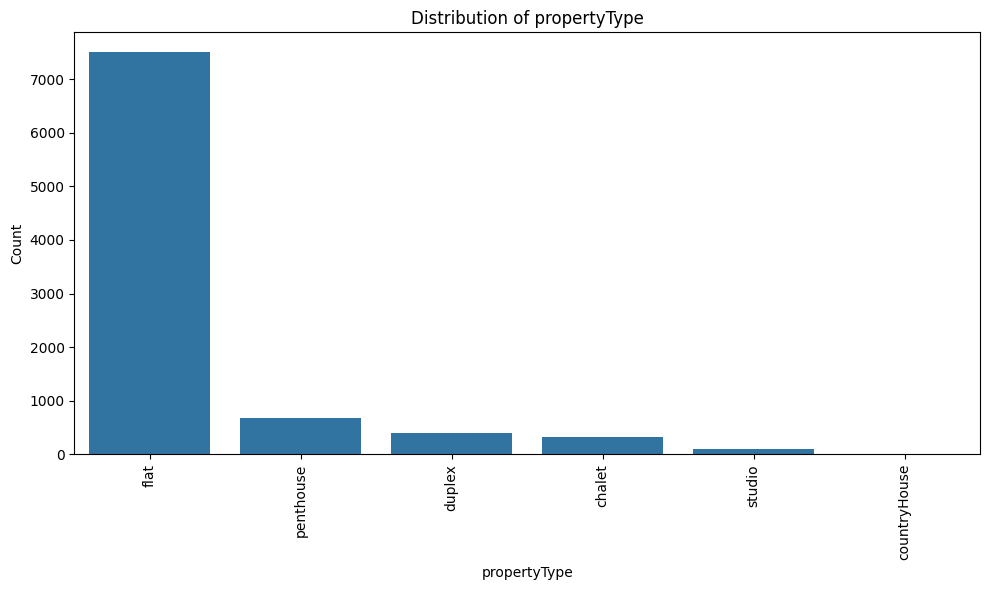

In [ ]:
plt.figure(figsize=(10, 6))  # Set the size of the plot
sns.countplot(data=df_idealista, x='propertyType', order=df_idealista['propertyType'].value_counts().index)
plt.title('Distribution of propertyType')
plt.xlabel('propertyType')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
df_idealista.loc[df_idealista['propertyType']=='countryHouse', 'propertyType'] = 'chalet'

def complete_propertyType_from_description(row):
    if not pd.isna(row['description']):
      if row['propertyType'] == 'flat':
        description = row['description'].lower()
        if 'dúplex' in description or 'duplex' in description:
            return 'duplex'
        if ('inversión' in description or 'inversores' in description) and 'ocupado' in description:
            return 'occupied flat'
        if 'ático' in description or 'atico' in description or 'última planta' in description:
            return 'penthouse'
        if 'loft' in description:
            return 'studio'
    return row['propertyType']
# Apply the function to each row
df_idealista['propertyType'] = df_idealista.apply(complete_propertyType_from_description, axis=1)

**Chalet exterior and floor missing values**

In [ ]:
# Filter the DataFrame where 'propertyType' is 'chalet'
chalet_df = df_idealista[df_idealista['propertyType'] == 'chalet']

# Count the number of NaN and non-NaN values in the 'exterior' column
nan_count = chalet_df['exterior'].isna().sum()
non_nan_count = chalet_df['exterior'].notna().sum()

print("Number of NaN values in 'exterior' when propertyType is 'chalet':", nan_count)
print("Number of non-NaN values in 'exterior' when propertyType is 'chalet':", non_nan_count)

nan_count = chalet_df['floor'].isna().sum()
non_nan_count = chalet_df['floor'].notna().sum()

print("Number of NaN values in 'floor' when propertyType is 'chalet':", nan_count)
print("Number of non-NaN values in 'floor' when propertyType is 'chalet':", non_nan_count)


Number of NaN values in 'exterior' when propertyType is 'chalet': 328
Number of non-NaN values in 'exterior' when propertyType is 'chalet': 0
Number of NaN values in 'floor' when propertyType is 'chalet': 327
Number of non-NaN values in 'floor' when propertyType is 'chalet': 1


In [ ]:
# If 'chalet', set the 'exterior' variable to TRUE and the 'floor' variable to 'chalet'
df_idealista.loc[df_idealista['propertyType'] == 'chalet', 'exterior'] = True
df_idealista.loc[df_idealista['propertyType'] == 'chalet', 'floor'] = 'chalet'

**floor**

In [ ]:
df_idealista.loc[df_idealista['floor'] == 'en', 'floor'] = 'entreplanta'
df_idealista.loc[df_idealista['floor'] == 'bj', 'floor'] = 'bajo'
df_idealista.loc[df_idealista['floor'] == 'ss', 'floor'] = 'semi-sótano'
df_idealista.loc[df_idealista['floor'] == 'st', 'floor'] = 'sótano'

In [ ]:
def fill_floor_from_description(row):
    if not pd.isna(row['description']):
        description = row['description'].lower()
        if 'entresuelo' in description:
            return 'entresuelo'
        if pd.isna(row['floor']):
            if 'entreplanta' in description:
                return 'entreplanta'
            if 'primera planta' in description or 'planta principal' in description or '1a planta' in description:
                return '1'
            if 'segunda planta' in description or '2a planta' in description:
                return '2'
            if 'tercera planta' in description or '3a planta' in description:
                return '3'
            if 'cuarta planta' in description or '4a planta' in description:
                return '4'
            if 'quinta planta' in description or '5a planta' in description:
                return '5'
            if 'sexta planta' in description or '6a planta' in description:
                return '6'
            if 'séptima planta' in description or '7a planta' in description:
                return '7'
            if 'octava planta' in description or '8a planta' in description:
                return '8'
            if 'novena planta' in description or '9a planta' in description:
                return '9'
            if 'décima planta' in description or '10a planta' in description:
                return '10'
            if 'undécima planta' in description or '11a planta' in description:
                return '11'
            if 'duodécima planta' in description or '12a planta' in description:
                return '12'
            if 'decimotercera planta' in description or '13a planta' in description:
                return '13'
            if 'decimocuarta planta' in description or '14a planta' in description:
                return '14'
            if 'decimoquinta planta' in description or '15a planta' in description:
                return '15'
            if 'decimosexta planta' in description or '16a planta' in description:
                return '16'
            if 'decimoséptima planta' in description or '17a planta' in description:
                return '17'
            if 'decimoctava planta' in description or '18a planta' in description:
                return '18'
            if 'decimonovena planta' in description or '19a planta' in description:
                return '19'
            if 'vigésima planta' in description or '20a planta' in description:
                return '20'
            if 'entrada directa desde calle' in description:
                return 'bajo'
            if ('ático' in description) or ('atico' in description) or ('última planta' in description):
                return 'penthouse'
    return row['floor']

# Apply the function to each row
df_idealista['floor'] = df_idealista.apply(fill_floor_from_description, axis=1)

Remaining floor missings are imputed with classification algorithm


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

df_not_missing = df_idealista[df_idealista['floor'].notna()][['neighborhood', 'price', 'propertyType', 'floor']]

# predictor variables and target variable
X = df_not_missing[['neighborhood', 'price', 'propertyType']]
y = df_not_missing['floor']

# Preprocess categorical variables
categorical_features = ['neighborhood', 'propertyType']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Apply preprocessing to the predictor variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)])

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', DecisionTreeClassifier())])
model.fit(X, y)

df_missing = df_idealista[df_idealista['floor'].isna()][['neighborhood', 'price', 'propertyType']]
# Predict missing values for 'floor'
X_missing = df_missing[['neighborhood', 'price', 'propertyType']]
predicted_floors = model.predict(X_missing)

df_missing['floor'] = predicted_floors
# Update df_idealista with imputed values
df_idealista.loc[df_missing.index, 'floor'] = predicted_floors

We analyzed the imputations and the results seemed coherent

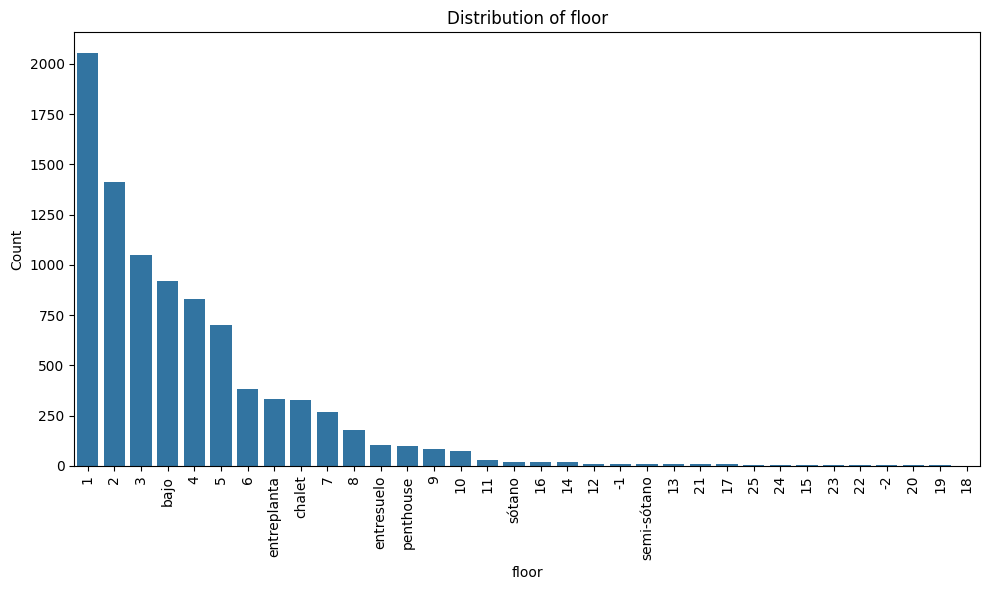

In [ ]:
plt.figure(figsize=(10, 6))  # Set the size of the plot
sns.countplot(data=df_idealista, x='floor', order=df_idealista['floor'].value_counts().index)
plt.title('Distribution of floor')
plt.xlabel('floor')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Try to balance the floor variable

In [ ]:
for i in range(17, 26):
  df_idealista.loc[df_idealista['floor'] == str(i), 'floor'] = '17 to 25'

for i in range(14, 17):
  df_idealista.loc[df_idealista['floor'] == str(i), 'floor'] = '14 to 16'

for i in range(10, 14):
  df_idealista.loc[df_idealista['floor'] == str(i), 'floor'] = '10 to 13'

df_idealista.loc[df_idealista['floor'] == 'semi-sótano', 'floor'] = 'sótano'
df_idealista.loc[df_idealista['floor'] == '-1', 'floor'] = 'bajo'
df_idealista.loc[df_idealista['floor'] == '-2', 'floor'] = 'bajo'

**exterior**

In [ ]:
# Filter out rows where 'exterior' is NaN
df_filtered = df_idealista.dropna(subset=['exterior'])
# Calculate median price for each group ('True' or 'False' in 'exterior')
median_prices = df_filtered.groupby('exterior')['price'].median()

print(median_prices)

exterior
False    310000.0
True     495000.0
Name: price, dtype: float64


In [ ]:
def fill_exterior_from_description(row):
    if pd.isna(row['exterior']):
      if not pd.isna(row['description']):
        description = row['description'].lower()
        if 'exterior' in description or 'balcones' in description or 'luz natural' in description or 'luminoso' in description or 'luminosa' in description:
          return True
        if 'interior' in description:
          return False
      else:
        if row['price'] > 400000.0:
          return True
        else:
          return False
    return row['exterior']

# Apply the function to each row
df_idealista['exterior'] = df_idealista.apply(fill_exterior_from_description, axis=1)

# Convert the exterior column to boolean type
df_idealista['exterior'] = df_idealista['exterior'].astype(bool)

**hasLift**

In [ ]:
# Next, let's update the missing values in hasLift based on the presence of 'ascensor' in the description

missing_lift_rows = df_idealista['hasLift'].isna()

# Now, search for 'ascensor' in the description for those rows
ascensor_in_description = df_idealista.loc[missing_lift_rows, 'description'].str.contains('ascensor', case=False)

# Update the missing values in hasLift based on the search results
# If 'ascensor' is found, set hasLift to True, otherwise False
df_idealista.loc[missing_lift_rows, 'hasLift'] = ascensor_in_description

# Convert the hasLift column to boolean type
df_idealista['hasLift'] = df_idealista['hasLift'].astype(bool)

In [ ]:
df_idealista.drop(columns=['description'], inplace=True)

In [ ]:
(df_idealista.isnull().sum() / len(df_idealista)) * 100

propertyCode       0.0
floor              0.0
price              0.0
propertyType       0.0
size               0.0
exterior           0.0
rooms              0.0
bathrooms          0.0
district           0.0
neighborhood       0.0
latitude           0.0
longitude          0.0
status             0.0
hasLift            0.0
hasParkingSpace    0.0
dtype: float64

## Outliers

#### Univariate Outliers

In [ ]:
def analyze_outliers(data, column_name):
    # Calculate summary statistics
    sm = data[column_name].describe()
    iqr = sm['75%'] - sm['25%']

    # Mild Outliers
    mild_ub = sm['75%'] + 1.5 * iqr
    mild_lb = max(sm['25%'] - 1.5 * iqr, 0)

    mild_outliers = np.sum((data[column_name] > mild_ub) | (data[column_name] < mild_lb))
    print("Number of mild outliers in " + column_name + ": ", mild_outliers)

    # Severe Outliers
    severe_ub = sm['75%'] + 3 * iqr
    severe_lb = max(sm['25%'] - 3 * iqr, 0)  # restriction of max because price always higher than 0
    severe_outliers = np.sum((data[column_name] > severe_ub) | (data[column_name] < severe_lb))
    print("Number of severe outliers in " + column_name + ": ", severe_outliers)

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[column_name])
    plt.title("Outlier Analysis for " + column_name)
    plt.axvline(x=mild_ub, color='orange', linewidth=2, label='Mild Outlier Boundary')
    plt.axvline(x=mild_lb, color='orange', linewidth=2)
    plt.axvline(x=severe_ub, color='red', linewidth=2.5, label='Severe Outlier Boundary')
    plt.axvline(x=severe_lb, color='red', linewidth=2.5)
    plt.legend()
    plt.show()

Number of mild outliers in size:  560
Number of severe outliers in size:  198


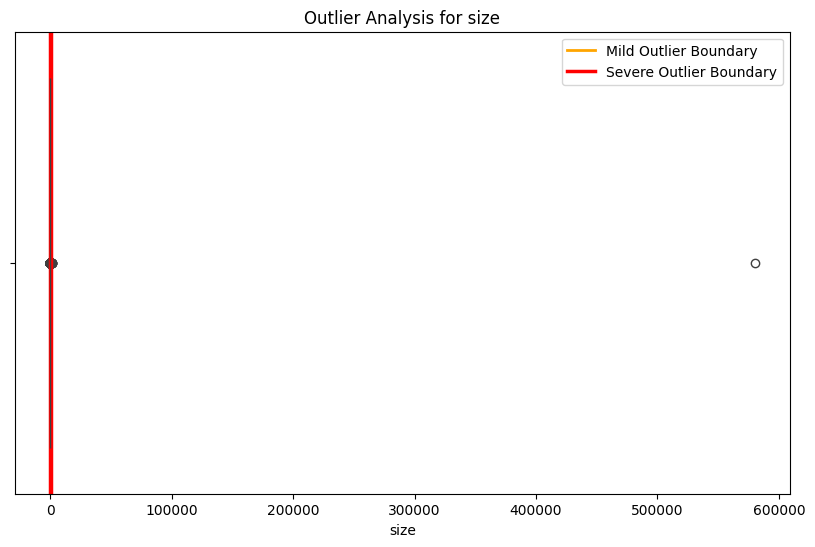

In [ ]:
analyze_outliers(df_idealista, 'size')

In [ ]:
df_idealista.nlargest(15, 'size')

,propertyCode,floor,price,propertyType,size,exterior,rooms,bathrooms,district,neighborhood,latitude,longitude,status,hasLift,hasParkingSpace
12546,104706619,14 to 16,580000.0,flat,580000.0,True,2,1,Sant Martí,El Besòs i el Maresme,41.413259,2.221569,good,True,False
945,97162822,chalet,3750000.0,chalet,1609.0,True,8,6,Les Corts,Pedralbes,41.389081,2.110493,good,False,True
944,96185396,chalet,3750000.0,chalet,1493.0,True,8,6,Les Corts,Pedralbes,41.392459,2.109651,good,False,True
10046,103910170,chalet,14000000.0,chalet,1413.0,True,8,9,Les Corts,Pedralbes,41.389042,2.109466,good,False,True
2899,101990029,chalet,8000000.0,chalet,1400.0,True,5,5,Sant Martí,El Poblenou,41.399847,2.204468,good,False,True
8433,95524420,1,3850000.0,flat,1200.0,True,3,2,Eixample,La Nova Esquerra de l'Eixample,41.380130,2.153590,good,False,False
2361,104489651,chalet,10500000.0,chalet,1050.0,True,7,9,Les Corts,Pedralbes,41.394939,2.112454,good,True,True
10025,103056223,chalet,7700000.0,chalet,1011.0,True,7,5,Les Corts,Pedralbes,41.394086,2.114228,renew,False,True
6555,101167817,bajo,12000000.0,flat,1000.0,True,5,4,Eixample,La Dreta de l'Eixample,41.391483,2.167008,good,False,False
737,104484265,chalet,10500000.0,chalet,938.0,True,7,8,Les Corts,Pedralbes,41.397447,2.114142,good,False,True


We drop the 15 largest size outliers because their values are extremely elevated compared to the rest of the dataset, representing only a minority of the cases. Keeping these outliers could disproportionately influence the training of the model, leading to less accurate results.

In [ ]:
index_to_drop = df_idealista['size'].nlargest(15).index
df_idealista.drop(index_to_drop, inplace=True)

Number of mild outliers in rooms:  42
Number of severe outliers in rooms:  8


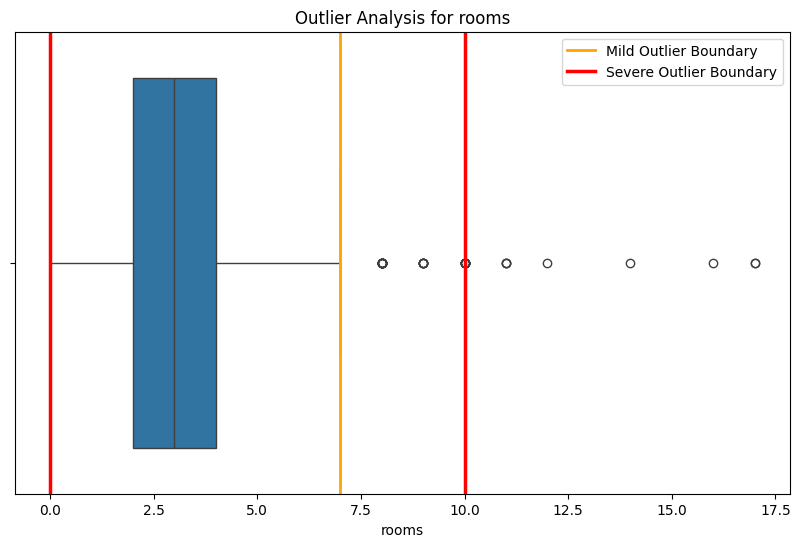

In [ ]:
analyze_outliers(df_idealista, 'rooms')

In [ ]:
df_idealista.nlargest(10, 'rooms')

,propertyCode,floor,price,propertyType,size,exterior,rooms,bathrooms,district,neighborhood,latitude,longitude,status,hasLift,hasParkingSpace
10736,98272942,chalet,1725000.0,chalet,667.0,True,17,8,Horta Guinardó,Horta,41.434221,2.157907,renew,False,True
11179,99936989,chalet,1725000.0,chalet,668.0,True,17,8,Horta Guinardó,Horta,41.430823,2.157827,good,False,True
10179,103995422,chalet,3750000.0,chalet,750.0,True,16,6,Les Corts,Pedralbes,41.390246,2.110280,renew,False,True
7254,103370301,6,1715000.0,flat,387.0,True,14,2,Sarrià-Sant Gervasi,Sant Gervasi - Galvany,41.394301,2.145701,renew,True,False
10022,99345419,chalet,3750000.0,chalet,593.0,True,12,1,Les Corts,Pedralbes,41.389529,2.111696,good,False,False
596,101146127,bajo,3000000.0,flat,504.0,True,11,8,Sarrià-Sant Gervasi,Les Tres Torres,41.397651,2.131022,good,True,True
871,89131054,chalet,4950000.0,chalet,773.0,True,11,8,Sarrià-Sant Gervasi,Sant Gervasi - La Bonanova,41.413409,2.130020,good,True,True
11353,104032491,chalet,950000.0,chalet,408.0,True,11,4,Sant Andreu,Sant Andreu,41.435152,2.189249,good,False,False
420,103500089,1,3300000.0,penthouse,455.0,True,10,3,Eixample,La Dreta de l'Eixample,41.392851,2.166198,good,True,False
1335,104251375,chalet,1451000.0,chalet,408.0,True,10,6,Gràcia,Vallcarca i els Penitents,41.419268,2.142030,good,False,True


In [ ]:
df_idealista.nsmallest(10, 'rooms')

,propertyCode,floor,price,propertyType,size,exterior,rooms,bathrooms,district,neighborhood,latitude,longitude,status,hasLift,hasParkingSpace
209,104440823,bajo,380000.0,studio,55.0,True,0,1,Gràcia,Vallcarca i els Penitents,41.415281,2.140528,good,False,True
924,104524919,1,175000.0,studio,33.0,True,0,1,Eixample,L'Antiga Esquerra de l'Eixample,41.388485,2.155339,good,True,False
1036,103092292,7,230000.0,studio,37.0,True,0,1,Eixample,La Sagrada Família,41.399935,2.175679,good,True,False
1072,104569517,9,236000.0,penthouse,30.0,True,0,1,Eixample,L'Antiga Esquerra de l'Eixample,41.386428,2.152852,good,True,False
1233,104496685,entreplanta,220000.0,studio,39.0,True,0,1,Sarrià-Sant Gervasi,Sant Gervasi - La Bonanova,41.410292,2.133885,good,True,False
1300,101732760,sótano,210000.0,studio,62.0,False,0,1,Gràcia,Vila de Gràcia,41.402927,2.152980,good,False,False
1518,90985155,entreplanta,345000.0,studio,93.0,True,0,1,Eixample,Sant Antoni,41.381928,2.162156,good,True,False
1633,103678949,bajo,210000.0,studio,62.0,True,0,1,Gràcia,Vila de Gràcia,41.404033,2.154905,good,False,False
1807,104319318,5,108000.0,studio,30.0,True,0,1,Ciutat Vella,El Raval,41.381640,2.167216,good,False,False
1831,104492129,3,145000.0,studio,30.0,True,0,1,Gràcia,El Camp d'En Grassot i Gràcia Nova,41.408994,2.165732,good,True,False


In [ ]:
indices_to_drop = df_idealista['rooms'].nlargest(4).index
df_idealista = df_idealista.drop(indices_to_drop)

df_idealista['propertyType'][1072] = 'studio'

<ipython-input-59-61afda502870>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_idealista['propertyType'][1072] = 'studio'


Number of mild outliers in bathrooms:  564
Number of severe outliers in bathrooms:  92


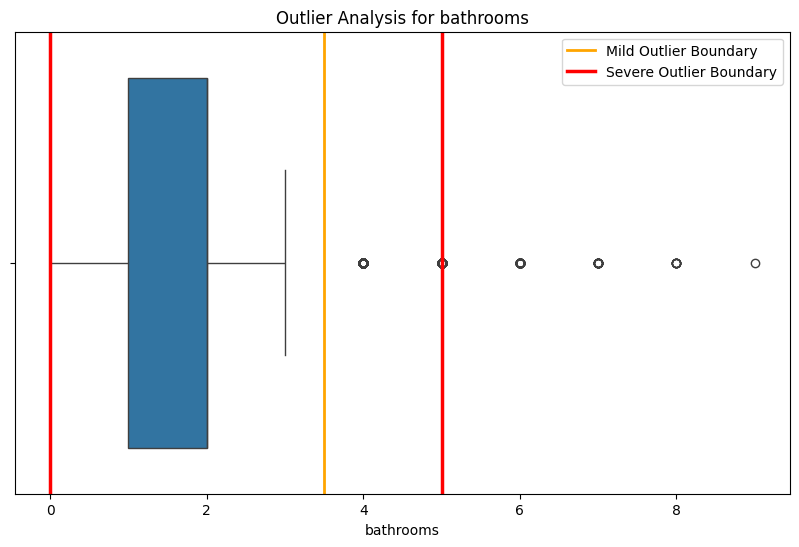

In [ ]:
analyze_outliers(df_idealista, 'bathrooms')

In [ ]:
df_idealista.nlargest(10, 'bathrooms')

,propertyCode,floor,price,propertyType,size,exterior,rooms,bathrooms,district,neighborhood,latitude,longitude,status,hasLift,hasParkingSpace
10146,103387232,chalet,4950000.0,chalet,694.0,True,7,9,Les Corts,Pedralbes,41.390982,2.112169,good,True,True
166,100397421,chalet,4950000.0,chalet,723.0,True,6,8,Les Corts,Pedralbes,41.387693,2.111758,good,True,True
505,104038283,7,3500000.0,penthouse,739.0,True,9,8,Sarrià-Sant Gervasi,El Putxet i el Farró,41.408180,2.137398,renew,True,True
596,101146127,bajo,3000000.0,flat,504.0,True,11,8,Sarrià-Sant Gervasi,Les Tres Torres,41.397651,2.131022,good,True,True
818,102140413,3,4950000.0,flat,549.0,True,5,8,Sarrià-Sant Gervasi,Sant Gervasi - Galvany,41.393741,2.134378,good,True,True
871,89131054,chalet,4950000.0,chalet,773.0,True,11,8,Sarrià-Sant Gervasi,Sant Gervasi - La Bonanova,41.413409,2.130020,good,True,True
6853,103451569,bajo,7000000.0,flat,600.0,True,6,8,Sarrià-Sant Gervasi,Sant Gervasi - La Bonanova,41.405306,2.128427,good,True,True
10427,102266582,chalet,4950000.0,chalet,723.0,True,6,8,Les Corts,Pedralbes,41.390198,2.109414,good,True,True
64,104012569,4,4500000.0,penthouse,300.0,True,4,7,Sarrià-Sant Gervasi,Sant Gervasi - Galvany,41.397534,2.138332,good,True,True
167,103516759,4,5000000.0,flat,614.0,True,7,7,Sarrià-Sant Gervasi,Sant Gervasi - Galvany,41.395386,2.138899,good,True,True


In [ ]:
df_idealista.nsmallest(10, 'bathrooms')

,propertyCode,floor,price,propertyType,size,exterior,rooms,bathrooms,district,neighborhood,latitude,longitude,status,hasLift,hasParkingSpace
3933,101143001,1,69000.0,studio,108.0,True,0,0,Horta Guinardó,El Carmel,41.422443,2.152887,renew,False,False
4601,86341501,chalet,1195000.0,chalet,560.0,True,0,0,Horta Guinardó,La Font d'En Fargues,41.424457,2.166281,renew,False,True
7062,104087524,2,1300000.0,studio,280.0,True,0,0,Sarrià-Sant Gervasi,Sant Gervasi - Galvany,41.390754,2.138117,renew,False,False
8046,104594970,bajo,72000.0,flat,24.0,True,1,0,Eixample,La Dreta de l'Eixample,41.392700,2.164162,renew,True,False
9963,103774061,4,211000.0,flat,59.0,True,2,0,Sants-Montjuïc,Sants - Badal,41.372824,2.124403,renew,True,False
11397,102611887,bajo,220000.0,flat,80.0,True,3,0,Nou Barris,Porta,41.436716,2.179178,renew,True,False
11832,104643807,chalet,154400.0,chalet,72.0,True,0,0,Horta Guinardó,El Carmel,41.418908,2.157124,renew,False,False
12085,103752817,bajo,280000.0,flat,208.0,False,2,0,Horta Guinardó,El Guinardó,41.421368,2.176451,renew,False,False
14275,104566991,bajo,169000.0,flat,79.0,True,1,0,Sants-Montjuïc,La Font de la Guatlla,41.372761,2.148363,renew,False,False
24,103375204,3,530000.0,flat,80.0,True,2,1,Ciutat Vella,El Raval,41.379281,2.172363,good,True,False


In [ ]:
indices_to_drop = df_idealista['bathrooms'].nsmallest(9).index
df_idealista = df_idealista.drop(indices_to_drop)

Number of mild outliers in price:  678
Number of severe outliers in price:  277


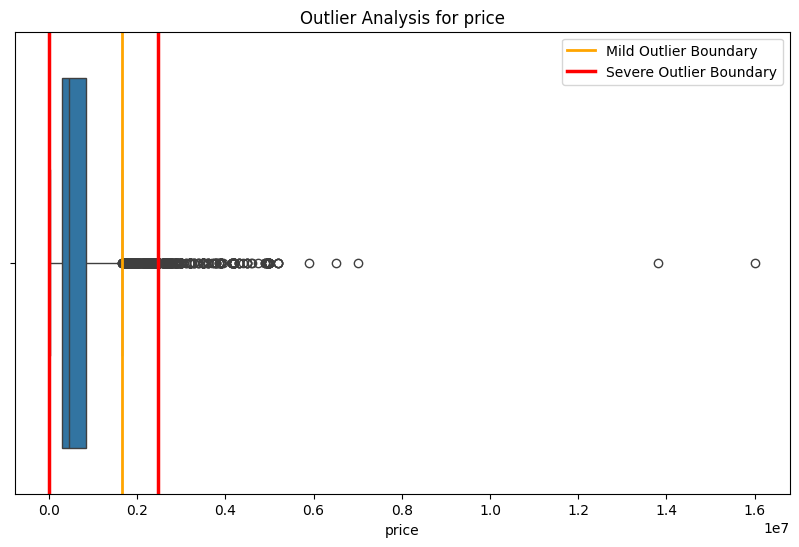

In [ ]:
analyze_outliers(df_idealista, 'price')

In [ ]:
df_idealista.nlargest(10, 'price')

,propertyCode,floor,price,propertyType,size,exterior,rooms,bathrooms,district,neighborhood,latitude,longitude,status,hasLift,hasParkingSpace
1325,103451010,bajo,16000000.0,duplex,415.0,True,5,6,Sarrià-Sant Gervasi,Sant Gervasi - La Bonanova,41.407928,2.135077,good,False,True
158,102207853,bajo,13800000.0,flat,700.0,True,6,4,Eixample,La Dreta de l'Eixample,41.390061,2.164023,renew,True,False
6853,103451569,bajo,7000000.0,flat,600.0,True,6,8,Sarrià-Sant Gervasi,Sant Gervasi - La Bonanova,41.405306,2.128427,good,True,True
1662,103322739,entreplanta,6500000.0,duplex,550.0,True,6,5,Eixample,La Dreta de l'Eixample,41.394996,2.165348,renew,True,False
2168,103461663,chalet,5900000.0,chalet,560.0,True,5,6,Sarrià-Sant Gervasi,Sarrià,41.405616,2.117742,good,False,True
509,97028172,9,5200000.0,penthouse,367.0,True,5,4,Eixample,La Dreta de l'Eixample,41.400073,2.172712,good,True,False
578,97391680,8,5200000.0,duplex,332.0,True,5,4,Eixample,La Dreta de l'Eixample,41.398173,2.172012,good,True,True
707,102568305,8,5200000.0,penthouse,508.0,True,5,4,Eixample,La Dreta de l'Eixample,41.399245,2.169168,good,True,False
858,97149589,7,5200000.0,duplex,508.0,True,5,5,Eixample,La Dreta de l'Eixample,41.400736,2.171608,renew,True,False
82,102988077,1,5000000.0,flat,530.0,True,5,6,Sarrià-Sant Gervasi,Sant Gervasi - Galvany,41.397945,2.137889,good,True,True


In [ ]:
df_idealista.nsmallest(5, 'price')

,propertyCode,floor,price,propertyType,size,exterior,rooms,bathrooms,district,neighborhood,latitude,longitude,status,hasLift,hasParkingSpace
11125,104487788,bajo,27500.0,studio,35.0,True,0,1,Nou Barris,Les Roquetes,41.446843,2.174645,renew,True,False
11960,104563648,bajo,40000.0,flat,55.0,False,2,1,Nou Barris,Can Peguera - El Turó de la Peira,41.433689,2.170589,good,True,False
12336,104563739,1,40000.0,flat,60.0,False,3,1,Nou Barris,Can Peguera - El Turó de la Peira,41.433962,2.169154,renew,False,False
12196,85620214,2,49000.0,flat,71.0,True,2,1,Nou Barris,Les Roquetes,41.448186,2.175675,renew,False,False
11665,103336966,entreplanta,51000.0,flat,31.0,True,1,1,Nou Barris,Les Roquetes,41.448022,2.176160,renew,False,False


Drop 5 largest, as they are very unique houses.

In [ ]:
indices_to_drop = df_idealista['price'].nlargest(5).index
df_idealista = df_idealista.drop(indices_to_drop)

#### Multivariate Outliers

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
from sklearn.covariance import EllipticEnvelope
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()
categorical_columns = ['floor', 'propertyType', 'exterior', 'hasLift', 'hasParkingSpace', 'status', 'district']
df_idealista_enc = df_idealista.drop(['neighborhood'], axis=1).copy()
for col in categorical_columns:
    df_idealista_enc[col] = label_encoder.fit_transform(df_idealista_enc[col])

# Drop any non-numeric columns that are not needed for the analysis
df_numeric = df_idealista_enc.select_dtypes(include=['int', 'float'])

# Initialize the Elliptic Envelope model
envelope = EllipticEnvelope(contamination=0.005)

envelope.fit(df_numeric)

outliers = envelope.predict(df_numeric)

# Add outlier predictions to the dataframe
df_idealista['Outlier'] = outliers

# Display outliers
outlier_df = df_idealista[df_idealista['Outlier'] == -1]
outlier_df

/usr/local/lib/python3.10/dist-packages/sklearn/covariance/_robust_covariance.py:184: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (32.626505404957406 > 32.579933978510645). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/covariance/_robust_covariance.py:184: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (33.902355085471051 > 33.217902454914316). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/covariance/_robust_covariance.py:184: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (32.498781111640447 > 29.251855098212740). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/usr/local/lib/python3

,propertyCode,floor,price,propertyType,size,exterior,rooms,bathrooms,district,neighborhood,latitude,longitude,status,hasLift,hasParkingSpace,Outlier
30,29714252,4,2500000.0,penthouse,318.0,True,3,2,Ciutat Vella,Sant Pere - Santa Caterina i la Ribera,41.387783,2.178827,good,True,False,-1
495,39346892,1,2500000.0,flat,257.0,True,4,5,Les Corts,Pedralbes,41.391953,2.113478,good,True,True,-1
509,97028172,9,5200000.0,penthouse,367.0,True,5,4,Eixample,La Dreta de l'Eixample,41.400073,2.172712,good,True,False,-1
516,33441841,3,1095000.0,duplex,173.0,True,4,2,Sarrià-Sant Gervasi,Sant Gervasi - Galvany,41.393847,2.140587,good,True,False,-1
578,97391680,8,5200000.0,duplex,332.0,True,5,4,Eixample,La Dreta de l'Eixample,41.398173,2.172012,good,True,True,-1
760,98928508,chalet,3200000.0,chalet,815.0,True,7,7,Sarrià-Sant Gervasi,Sant Gervasi - La Bonanova,41.410807,2.127166,good,True,True,-1
783,82606945,1,4500000.0,flat,471.0,True,6,5,Sarrià-Sant Gervasi,Sant Gervasi - La Bonanova,41.405524,2.131718,good,True,True,-1
785,103448030,chalet,3200000.0,chalet,815.0,True,7,7,Sarrià-Sant Gervasi,Sant Gervasi - La Bonanova,41.407973,2.124527,good,True,False,-1
871,89131054,chalet,4950000.0,chalet,773.0,True,11,8,Sarrià-Sant Gervasi,Sant Gervasi - La Bonanova,41.413409,2.130020,good,True,True,-1
1026,35309323,5,1740000.0,penthouse,180.0,True,4,3,Sarrià-Sant Gervasi,Sant Gervasi - Galvany,41.399825,2.147444,good,True,False,-1


We decided to remove these 45 outliers as they represent types of houses very uncomom on the city.
*   Houses with a very big surface and low price (and inversa).
*   Houses with very small/large number of rooms or bathrooms.
*   Other combinations.

In [ ]:
df_idealista = df_idealista[df_idealista['Outlier'] != -1].drop(columns=['Outlier'])

## Categorize Target Variable

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

kbins = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='kmeans')
df_idealista['price_binned'] = kbins.fit_transform(df_idealista[['price']])

print(df_idealista['price_binned'].value_counts())

price_binned
0.0    5601
1.0    2263
2.0     861
3.0     190
Name: count, dtype: int64


In [ ]:
for i in df_idealista['price_binned'].unique():
    bin_prices = df_idealista[df_idealista['price_binned'] == i]['price']
    print(f"Cluster {i}: min = {bin_prices.min()}, max = {bin_prices.max()}")

Cluster 1.0: min = 606000.0, max = 1329000.0
Cluster 2.0: min = 1335000.0, max = 2650000.0
Cluster 0.0: min = 27500.0, max = 605000.0
Cluster 3.0: min = 2680000.0, max = 5200000.0


In [ ]:
cluster_to_category = {0: 'Low', 1: 'Medium', 2: 'High', 3: 'Very High'}

df_idealista['Price_Category'] = df_idealista['price_binned'].map(cluster_to_category)

# Display the first few rows to verify the new column
print(df_idealista[['price', 'price_binned', 'Price_Category']].head())

       price  price_binned Price_Category
0  1178000.0           1.0         Medium
1  2600000.0           2.0           High
2  1595000.0           2.0           High
3  1470000.0           2.0           High
4  1668000.0           2.0           High


In [ ]:
df_idealista.drop('price_binned', axis=1, inplace=True)

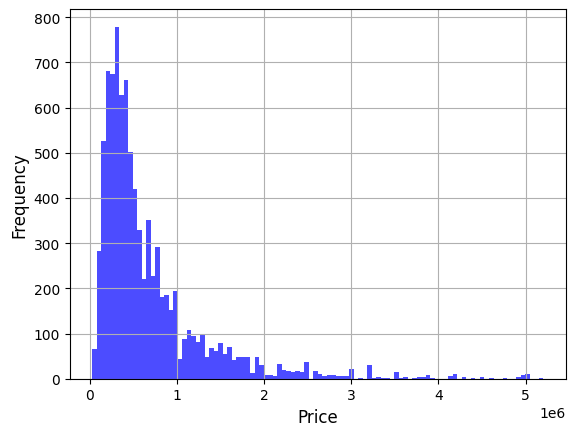

In [ ]:
plt.hist(df_idealista['price'], bins=100, alpha=0.7, color='blue')
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()


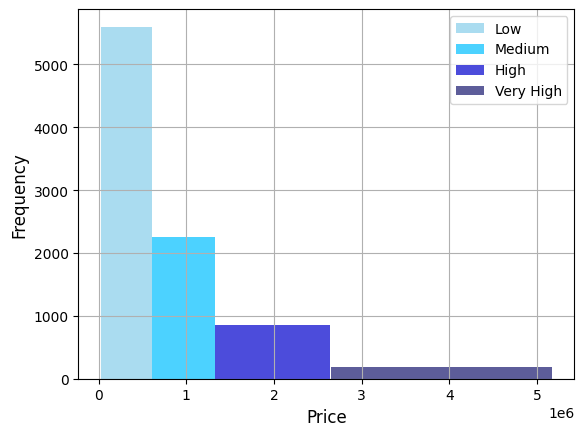

In [ ]:
Price_Category = ['Low', 'Medium', 'High', 'Very High']
left_edges = [27500, 606000, 1329000, 2650000]
widths = [577500, 723000, 1315000, 2520000]
frequencies = [5601, 2263, 861, 190]

colors = ['skyblue', 'deepskyblue', 'mediumblue', 'midnightblue']

plt.bar(left_edges, frequencies, width=widths, alpha=0.7, align='edge', color=colors, label=Price_Category)

plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
df_idealista.to_csv('/content/drive/MyDrive/ML_Project/CSV/idealista_CSV/idealista_barcelona_clean.csv')

# OpenData BCN Poblacio

In [ ]:
df_poblacio = pd.read_csv('/content/drive/MyDrive/ML_Project/CSV/opendata_CSV/poblacio_barcelona.csv')

## Exploratory analysis

In [ ]:
df_poblacio # overview of the dataset

,Unnamed: 0,Nom_Districte,Nom_Barri,Valor,NACIONALITAT_CONTINENT,EDAT_Q,SEXE
0,0,Ciutat Vella,el Raval,46,Africa,<5 years,Female
1,1,Ciutat Vella,el Raval,49,Africa,<5 years,Male
2,2,Ciutat Vella,el Raval,30,Africa,5-9 years,Female
3,3,Ciutat Vella,el Raval,34,Africa,5-9 years,Male
4,4,Ciutat Vella,el Raval,14,Africa,10-14 years,Female
...,...,...,...,...,...,...,...
10637,10637,Sant Martí,la Verneda i la Pau,..,Oceania,30-34 years,Female
10638,10638,Sant Martí,la Verneda i la Pau,..,Oceania,30-34 years,Male
10639,10639,Sant Martí,la Verneda i la Pau,..,Oceania,35-39 years,Male
10640,10640,Sant Martí,la Verneda i la Pau,..,Not available,35-39 years,Female


In [ ]:
df_poblacio.drop(columns=['Unnamed: 0'], inplace=True) # delete the id for the analysis

In [ ]:
df_poblacio = df_poblacio[~df_poblacio['NACIONALITAT_CONTINENT'].isin(['Not available'])]

df_poblacio.loc[df_poblacio['Valor'] == '..', 'Valor'] = 0   #random.randrange(5)  # Generates a random integer between 0 and 4
df_poblacio['Valor'] = pd.to_numeric(df_poblacio['Valor'], errors='raise')

age_mapping = {
    '<5 years': '≤19 years',
    '5-9 years': '≤19 years',
    '10-14 years': '≤19 years',
    '15-19 years': '≤19 years',
    '20-24 years': '20-44 years',
    '25-29 years': '20-44 years',
    '30-34 years': '20-44 years',
    '35-39 years': '20-44 years',
    '40-44 years': '20-44 years',
    '45-49 years': '45-69 years',
    '50-54 years': '45-69 years',
    '55-59 years': '45-69 years',
    '60-64 years': '45-69 years',
    '65-69 years': '45-69 years',
    '70-74 years': '≥70 years',
    '75-79 years': '≥70 years',
    '80-84 years': '≥70 years',
    '85-89 years': '≥70 years',
    '90-94 years': '≥70 years',
    '95-99 years': '≥70 years',
    '≥100 years': '≥70 years'
}

# Apply the mapping
df_poblacio['Age_Group'] = df_poblacio['EDAT_Q'].map(age_mapping)

# Group by the new categories and other relevant fields
df_poblacio = df_poblacio.groupby(['Nom_Districte', 'Nom_Barri', 'NACIONALITAT_CONTINENT', 'SEXE', 'Age_Group']).sum()

# Reset index if you want the grouped columns to be columns again
df_poblacio = df_poblacio.reset_index()
df_poblacio.drop(columns=['EDAT_Q'], inplace=True)

df_poblacio

<ipython-input-82-506c72b0d344>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_poblacio.loc[df_poblacio['Valor'] == '..', 'Valor'] = 0   #random.randrange(5)  # Generates a random integer between 0 and 4
<ipython-input-82-506c72b0d344>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_poblacio['Valor'] = pd.to_numeric(df_poblacio['Valor'], errors='raise')
<ipython-input-82-506c72b0d344>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

,Nom_Districte,Nom_Barri,NACIONALITAT_CONTINENT,SEXE,Age_Group,Valor
0,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",Africa,Female,20-44 years,134
1,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",Africa,Female,45-69 years,57
2,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",Africa,Female,≤19 years,47
3,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",Africa,Female,≥70 years,0
4,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",Africa,Male,20-44 years,268
...,...,...,...,...,...,...
2455,Sarrià-Sant Gervasi,les Tres Torres,Europe,Male,≤19 years,1860
2456,Sarrià-Sant Gervasi,les Tres Torres,Europe,Male,≥70 years,1078
2457,Sarrià-Sant Gervasi,les Tres Torres,Oceania,Female,20-44 years,0
2458,Sarrià-Sant Gervasi,les Tres Torres,Oceania,Male,20-44 years,0


In [ ]:
df_poblacio.dtypes

Nom_Districte             object
Nom_Barri                 object
NACIONALITAT_CONTINENT    object
SEXE                      object
Age_Group                 object
Valor                      int64
dtype: object

In [ ]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

# Function to perform fuzzy string matching
def fuzzy_match(name, choices, threshold=70):
    """
    Finds the best match for a given name in a list of choices using fuzzy matching.

    Parameters:
        name (str): The name to find a match for.
        choices (list of str): The list of choices to search within.
        threshold (int, optional): The minimum score required for a match. Defaults to 90.

    Returns:
        str or None: The best matching choice, or None if no match is found.
    """
    result = process.extractOne(name, choices, scorer=fuzz.token_sort_ratio)
    if result[1] >= threshold:
        return result[0]
    else:
        return None

idealista_districts = df_idealista['district'].unique()
print("Districts:\n")
# Compare district names between df_poblacio and df_idealista
for district_poblacio in idealista_districts:
    matched_district = fuzzy_match(district_poblacio, df_poblacio['Nom_Districte'])
    if matched_district is not None:
        if matched_district != district_poblacio:
          df_poblacio.loc[df_poblacio['Nom_Districte'] == matched_district, 'Nom_Districte'] = district_poblacio
        print(f"Match found: '{district_poblacio}' in df_idealista matches '{matched_district}' in df_poblacio.")
    else:
        print(f"No match found for '{district_poblacio}' in df_poblacio.")

idealista_neighborhoods = df_idealista['neighborhood'].unique()
print("\nNeighborhoods:\n")
# Compare district names between df_poblacio and df_idealista
for neighborhood_poblacio in idealista_neighborhoods:
    matched_neighborhood = fuzzy_match(neighborhood_poblacio, df_poblacio['Nom_Barri'])
    if matched_neighborhood is not None:
        if matched_neighborhood != neighborhood_poblacio:
          df_poblacio.loc[df_poblacio['Nom_Barri'] == matched_neighborhood, 'Nom_Barri'] = neighborhood_poblacio
        print(f"Match found: '{neighborhood_poblacio}' in df_idealista matches '{matched_neighborhood}' in df_poblacio.")
    else:
        print(f"No match found for '{neighborhood_poblacio}' in df_poblacio.")

/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


Districts:

Match found: 'Sarrià-Sant Gervasi' in df_idealista matches 'Sarrià-Sant Gervasi' in df_poblacio.
Match found: 'Eixample' in df_idealista matches 'Eixample' in df_poblacio.
Match found: 'Ciutat Vella' in df_idealista matches 'Ciutat Vella' in df_poblacio.
Match found: 'Les Corts' in df_idealista matches 'Les Corts' in df_poblacio.
Match found: 'Gràcia' in df_idealista matches 'Gràcia' in df_poblacio.
Match found: 'Sants-Montjuïc' in df_idealista matches 'Sants-Montjuïc' in df_poblacio.
Match found: 'Horta Guinardó' in df_idealista matches 'Horta-Guinardó' in df_poblacio.
Match found: 'Sant Martí' in df_idealista matches 'Sant Martí' in df_poblacio.
Match found: 'Sant Andreu' in df_idealista matches 'Sant Andreu' in df_poblacio.
Match found: 'Nou Barris' in df_idealista matches 'Nou Barris' in df_poblacio.

Neighborhoods:

Match found: 'El Putxet i el Farró' in df_idealista matches 'el Putxet i el Farró' in df_poblacio.
Match found: 'Sant Gervasi - Galvany' in df_idealista ma

## Transform data

In [ ]:
# function to transform the data
def transform_population_data(df, groupby_columns):
    grouped_df = df.groupby(groupby_columns)['Valor'].sum().reset_index()
    grouped_df = grouped_df.pivot(index=groupby_columns[0], columns=groupby_columns[1], values='Valor').reset_index()
    grouped_df.columns.name = None
    grouped_df.columns = ['Nom_Barri'] + [col.capitalize() for col in grouped_df.columns[1:]]
    return grouped_df

In [ ]:
ppl_neighborhood_age=transform_population_data(df_poblacio, ['Nom_Barri', 'Age_Group'])
ppl_neighborhood_age

,Nom_Barri,20-44 years,45-69 years,≤19 years,≥70 years
0,Baró de Viver,809,880,513,263
1,Can Baró,3290,3036,1519,1505
2,Can Peguera,610,737,356,360
3,Can Peguera - El Turó de la Peira,5688,5229,3067,2269
4,Canyelles,1767,2461,965,1478
...,...,...,...,...,...
68,Vilapicina i la Torre Llobeta,8068,8889,4041,4873
69,el Bon Pastor,4991,4814,2948,1636
70,la Clota,222,209,135,62
71,la Marina del Prat Vermell,605,506,297,143


In [ ]:
ppl_neighborhood_nacionality = transform_population_data(df_poblacio, ['Nom_Barri', 'NACIONALITAT_CONTINENT'])
ppl_neighborhood_nacionality

,Nom_Barri,Africa,Americas,Asia,Europe,Oceania
0,Baró de Viver,31.0,96.0,85.0,2253.0,NaN
1,Can Baró,100.0,774.0,217.0,8259.0,0.0
2,Can Peguera,5.0,63.0,0.0,1995.0,NaN
3,Can Peguera - El Turó de la Peira,277.0,2306.0,917.0,12753.0,0.0
4,Canyelles,0.0,241.0,64.0,6366.0,NaN
...,...,...,...,...,...,...
68,Vilapicina i la Torre Llobeta,209.0,2352.0,935.0,22375.0,NaN
69,el Bon Pastor,379.0,2022.0,904.0,11084.0,0.0
70,la Clota,0.0,0.0,11.0,617.0,NaN
71,la Marina del Prat Vermell,0.0,55.0,0.0,1496.0,NaN


In [ ]:
# Replace NaN values with 0 for the entire DataFrame
ppl_neighborhood_nacionality = ppl_neighborhood_nacionality.fillna(0)

In [ ]:
# # Plotting
# for index, row in ppl_district_nacionality.iterrows():
#     plt.figure(figsize=(3,2))
#     plt.bar(row.index[1:], row.values[1:], color=['blue', 'orange', 'green', 'red', 'purple'])
#     plt.title(row['Nom_Districte'])
#     plt.xlabel('Continents')
#     plt.ylabel('Population')
#     plt.xticks(rotation=45)
#     plt.show()

In [ ]:
def transform_population_data2(df, groupby_columns):
    poblacio_districte_sexe = df.groupby(groupby_columns)['Valor'].sum().reset_index()
    poblacio_districte_sexe = poblacio_districte_sexe.pivot(index=groupby_columns[0], columns=[groupby_columns[1], groupby_columns[2]], values='Valor').reset_index()
    poblacio_districte_sexe.columns.name = None
    poblacio_districte_sexe.columns = [groupby_columns[0]] + [f"{col[0]}_{col[1].capitalize()}" for col in poblacio_districte_sexe.columns[1:]]
    return poblacio_districte_sexe

In [ ]:
ppl_district_sexe_age = transform_population_data2(df_poblacio, ['Nom_Districte', 'SEXE','Age_Group'])
ppl_district_sexe_age

,Nom_Districte,Female_20-44 years,Female_45-69 years,Female_≤19 years,Female_≥70 years,Male_20-44 years,Male_45-69 years,Male_≤19 years,Male_≥70 years
0,Ciutat Vella,23685,13193,6807,5460,30238,15845,7347,3574
1,Eixample,53206,44175,17657,27459,51939,38679,18589,16714
2,Gràcia,24244,20312,8991,12652,21839,17450,9600,7452
3,Horta Guinardó,29471,30628,13677,18978,28597,27325,14427,11674
4,Les Corts,12773,14300,6743,10025,12399,11855,7068,6816
5,Nou Barris,28693,30236,14869,17937,27960,26957,15523,11145
6,Sant Andreu,24232,27441,12636,14996,24087,24421,13612,9944
7,Sant Martí,40889,42335,19763,22229,42060,39194,20970,14665
8,Sants-Montjuïc,34284,31782,13332,16776,35149,28813,14528,10787
9,Sarrià-Sant Gervasi,23868,26125,15109,15669,21635,21927,15572,9384


In [ ]:
# for index, row in ppl_district_sexe_age.iterrows():
#     plt.figure(figsize=(5, 3))
#     plt.bar(row.index[1:], row.values[1:], color=['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray'])
#     plt.title(row['Nom_Districte'])
#     plt.xlabel('Age Groups and Genders')
#     plt.ylabel('Population Count')
#     plt.xticks(rotation=45)
#     plt.show()

In [ ]:
pivot_df = df_poblacio.pivot_table(index=['Nom_Districte'], columns=['NACIONALITAT_CONTINENT', 'SEXE', 'Age_Group'], values='Valor', aggfunc='sum')
pivot_df = pivot_df.reset_index()
pivot_df

NACIONALITAT_CONTINENT        Nom_Districte      Africa                        \
SEXE                                             Female                         
Age_Group                                   20-44 years 45-69 years ≤19 years   
0                              Ciutat Vella       846.0       376.0     221.0   
1                                  Eixample       644.0       136.0     128.0   
2                                    Gràcia       259.0        44.0      35.0   
3                            Horta Guinardó       394.0        98.0      73.0   
4                                 Les Corts       144.0        49.0      61.0   
5                                Nou Barris       740.0       302.0     236.0   
6                               Sant Andreu       369.0       190.0     117.0   
7                                Sant Martí       636.0       275.0     195.0   
8                            Sants-Montjuïc       654.0       242.0     174.0   
9                       Sarrià-Sant Gervasi       194.0        32.0      25.0   

NACIONALITAT_CONTINENT                                                        \
SEXE                                    Male                                   
Age_Group              ≥70 years 20-44 years 45-69 years ≤19 years ≥70 years   
0                           35.0      2444.0       788.0     323.0      39.0   
1                            0.0      1139.0       320.0     154.0       5.0   
2                            0.0       430.0        90.0      66.0       0.0   
3                            0.0       742.0       234.0     150.0       0.0   
4                            0.0       225.0        52.0      42.0       0.0   
5                            0.0      1207.0       431.0     309.0       0.0   
6                            5.0       873.0       309.0     194.0       5.0   
7                           13.0      1504.0       578.0     263.0       5.0   
8                            5.0      1500.0       502.0     353.0      12.0   
9                            0.0       419.0        92.0      34.0       0.0   

NACIONALITAT_CONTINENT    Americas                                  \
SEXE                        Female                                   
Age_Group              20-44 years 45-69 years ≤19 years ≥70 years   
0                           4310.0       941.0     540.0      93.0   
1                          10014.0      2551.0    1143.0     405.0   
2                           3801.0       947.0     477.0     133.0   
3                           5729.0      1962.0    1309.0     208.0   
4                           1839.0       593.0     362.0      70.0   
5                           6852.0      2377.0    1760.0     239.0   
6                           3927.0      1444.0     776.0     152.0   
7                           6241.0      2006.0    1110.0     309.0   
8                           6108.0      1912.0    1125.0     256.0   
9                           2676.0       997.0     512.0     156.0   

NACIONALITAT_CONTINENT                                              \
SEXE                          Male                                   
Age_Group              20-44 years 45-69 years ≤19 years ≥70 years   
0                           3901.0       871.0     514.0      71.0   
1                           8515.0      1881.0    1051.0     246.0   
2                           2854.0       620.0     510.0      62.0   
3                           4693.0      1321.0    1324.0      75.0   
4                           1419.0       382.0     363.0      53.0   
5                           5367.0      1697.0    1844.0      66.0   
6                           3223.0      1030.0     876.0      62.0   
7                           5096.0      1367.0    1155.0     145.0   
8                           5422.0      1463.0    1144.0      86.0   
9                           1665.0       576.0     514.0     111.0   

NACIONALITAT_CONTINENT        Asia                                  \
SEXE         

## Merge

In [ ]:
# Merge the datasets one by one on the 'District' column
merged_df_poblacio = pd.merge(ppl_neighborhood_nacionality, ppl_neighborhood_age, on='Nom_Barri')
merged_df_poblacio

,Nom_Barri,Africa,Americas,Asia,Europe,Oceania,20-44 years,45-69 years,≤19 years,≥70 years
0,Baró de Viver,31.0,96.0,85.0,2253.0,0.0,809,880,513,263
1,Can Baró,100.0,774.0,217.0,8259.0,0.0,3290,3036,1519,1505
2,Can Peguera,5.0,63.0,0.0,1995.0,0.0,610,737,356,360
3,Can Peguera - El Turó de la Peira,277.0,2306.0,917.0,12753.0,0.0,5688,5229,3067,2269
4,Canyelles,0.0,241.0,64.0,6366.0,0.0,1767,2461,965,1478
...,...,...,...,...,...,...,...,...,...,...
68,Vilapicina i la Torre Llobeta,209.0,2352.0,935.0,22375.0,0.0,8068,8889,4041,4873
69,el Bon Pastor,379.0,2022.0,904.0,11084.0,0.0,4991,4814,2948,1636
70,la Clota,0.0,0.0,11.0,617.0,0.0,222,209,135,62
71,la Marina del Prat Vermell,0.0,55.0,0.0,1496.0,0.0,605,506,297,143


In [ ]:
# Change variable names
merged_df_poblacio.rename(columns={
    'Africa': 'African_population',
    'Americas': 'American_population',
    'Asia': 'Asian_population',
    'Europe': 'European_population',
    'Oceania': 'Oceanian_population',
    '20-44 years': 'Population_20_44',
    '45-69 years': 'Population_45_69',
    '≤19 years': 'Population_less_than_19',
    '≥70 years': 'Population_greater_than_70',
}, inplace=True)

merged_df_poblacio

,Nom_Barri,African_population,American_population,Asian_population,European_population,Oceanian_population,Population_20_44,Population_45_69,Population_less_than_19,Population_greater_than_70
0,Baró de Viver,31.0,96.0,85.0,2253.0,0.0,809,880,513,263
1,Can Baró,100.0,774.0,217.0,8259.0,0.0,3290,3036,1519,1505
2,Can Peguera,5.0,63.0,0.0,1995.0,0.0,610,737,356,360
3,Can Peguera - El Turó de la Peira,277.0,2306.0,917.0,12753.0,0.0,5688,5229,3067,2269
4,Canyelles,0.0,241.0,64.0,6366.0,0.0,1767,2461,965,1478
...,...,...,...,...,...,...,...,...,...,...
68,Vilapicina i la Torre Llobeta,209.0,2352.0,935.0,22375.0,0.0,8068,8889,4041,4873
69,el Bon Pastor,379.0,2022.0,904.0,11084.0,0.0,4991,4814,2948,1636
70,la Clota,0.0,0.0,11.0,617.0,0.0,222,209,135,62
71,la Marina del Prat Vermell,0.0,55.0,0.0,1496.0,0.0,605,506,297,143


# OpenData BCN Rent

In [ ]:
df_renda = pd.read_csv('/content/drive/MyDrive/ML_Project/CSV/opendata_CSV/renda_barcelona.csv')
df_renda.drop(columns='Unnamed: 0', inplace=True)
df_renda

,Nom_Barri,Distribucio_P80_20
0,el Raval,3.6
1,el Raval,2.9
2,el Raval,3.4
3,el Raval,3.0
4,el Raval,3.0
...,...,...
1063,la Verneda i la Pau,2.4
1064,el Clot,2.3
1065,Diagonal Mar i el Front Marítim del Poblenou,2.9
1066,Diagonal Mar i el Front Marítim del Poblenou,2.3


In [ ]:
idealista_neighborhoods = df_idealista['neighborhood'].unique()
print("\nNeighborhoods:\n")
# Compare district names between df_renda and df_idealista
for neighborhood_poblacio in idealista_neighborhoods:
    matched_neighborhood = fuzzy_match(neighborhood_poblacio, df_renda['Nom_Barri'])
    if matched_neighborhood is not None:
        if matched_neighborhood != neighborhood_poblacio:
          df_renda.loc[df_renda['Nom_Barri'] == matched_neighborhood, 'Nom_Barri'] = neighborhood_poblacio
        print(f"Match found: '{neighborhood_poblacio}' in df_idealista matches '{matched_neighborhood}' in df_renda.")
    else:
        print(f"No match found for '{neighborhood_poblacio}' in df_renda.")


Neighborhoods:

Match found: 'El Putxet i el Farró' in df_idealista matches 'el Putxet i el Farró' in df_renda.
Match found: 'Sant Gervasi - Galvany' in df_idealista matches 'Sant Gervasi- Galvany' in df_renda.
Match found: 'La Dreta de l'Eixample' in df_idealista matches 'la Dreta de l'Eixample' in df_renda.
Match found: 'Sant Gervasi - La Bonanova' in df_idealista matches 'Sant Gervasi- la Bonanova' in df_renda.
Match found: 'L'Antiga Esquerra de l'Eixample' in df_idealista matches 'l'Antiga Esquerra de l'Eixample' in df_renda.
Match found: 'Les Tres Torres' in df_idealista matches 'les Tres Torres' in df_renda.
Match found: 'El Raval' in df_idealista matches 'el Raval' in df_renda.
Match found: 'Sant Antoni' in df_idealista matches 'Sant Antoni' in df_renda.
Match found: 'Pedralbes' in df_idealista matches 'Pedralbes' in df_renda.
Match found: 'Vallcarca i els Penitents' in df_idealista matches 'Vallcarca i els Penitents' in df_renda.
Match found: 'El Fort Pienc' in df_idealista ma

In [ ]:
df_renda = df_renda.groupby(['Nom_Barri'])['Distribucio_P80_20'].mean()

# Reset index to convert the result to a DataFrame
df_renda = df_renda.reset_index()
df_renda

,Nom_Barri,Distribucio_P80_20
0,Baró de Viver,2.500000
1,Can Baró,2.742857
2,Can Peguera,2.650000
3,Can Peguera - El Turó de la Peira,2.710000
4,Canyelles,2.080000
...,...,...
68,Vilapicina i la Torre Llobeta,2.647368
69,el Bon Pastor,2.542857
70,la Clota,2.400000
71,la Marina del Prat Vermell,2.800000


## Merge

In [ ]:
merged_df_poblacio = pd.merge(df_renda, merged_df_poblacio, on='Nom_Barri', how='left')
merged_df_poblacio

,Nom_Barri,Distribucio_P80_20,African_population,American_population,Asian_population,European_population,Oceanian_population,Population_20_44,Population_45_69,Population_less_than_19,Population_greater_than_70
0,Baró de Viver,2.500000,31.0,96.0,85.0,2253.0,0.0,809,880,513,263
1,Can Baró,2.742857,100.0,774.0,217.0,8259.0,0.0,3290,3036,1519,1505
2,Can Peguera,2.650000,5.0,63.0,0.0,1995.0,0.0,610,737,356,360
3,Can Peguera - El Turó de la Peira,2.710000,277.0,2306.0,917.0,12753.0,0.0,5688,5229,3067,2269
4,Canyelles,2.080000,0.0,241.0,64.0,6366.0,0.0,1767,2461,965,1478
...,...,...,...,...,...,...,...,...,...,...,...
68,Vilapicina i la Torre Llobeta,2.647368,209.0,2352.0,935.0,22375.0,0.0,8068,8889,4041,4873
69,el Bon Pastor,2.542857,379.0,2022.0,904.0,11084.0,0.0,4991,4814,2948,1636
70,la Clota,2.400000,0.0,0.0,11.0,617.0,0.0,222,209,135,62
71,la Marina del Prat Vermell,2.800000,0.0,55.0,0.0,1496.0,0.0,605,506,297,143


# OpenData BCN Education

In [ ]:
df_education = pd.read_csv('/content/drive/MyDrive/ML_Project/CSV/opendata_CSV/educacio_barcelona.csv')
df_education.drop(columns='Unnamed: 0', inplace=True)
df_education

,Nom_Barri,Valor,NIV_EDUCA_esta
0,el Raval,8,Less than primary education
1,el Raval,..,Less than primary education
2,el Raval,103,Primary education
3,el Raval,118,Primary education
4,el Raval,103,Lower secondary education
...,...,...,...
12682,la Verneda i la Pau,196,Upper secondary or post-secondary non-tertiary...
12683,la Verneda i la Pau,147,Tertiary education
12684,la Verneda i la Pau,109,Tertiary education
12685,la Verneda i la Pau,18,Not available


In [ ]:
df_education = df_education[~df_education['NIV_EDUCA_esta'].isin(['Not available'])]

df_education.loc[df_education['Valor'] == '..', 'Valor'] = 0   #random.randrange(5)  # Generates a random integer between 0 and 4
df_education['Valor'] = pd.to_numeric(df_education['Valor'], errors='raise')

<ipython-input-101-4da68e574e43>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_education.loc[df_education['Valor'] == '..', 'Valor'] = 0   #random.randrange(5)  # Generates a random integer between 0 and 4
<ipython-input-101-4da68e574e43>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_education['Valor'] = pd.to_numeric(df_education['Valor'], errors='raise')


In [ ]:
df_education = df_education.groupby(['Nom_Barri', 'NIV_EDUCA_esta'])['Valor'].mean()

# Reset index to convert the result to a DataFrame
df_education = df_education.reset_index()
df_education

,Nom_Barri,NIV_EDUCA_esta,Valor
0,Baró de Viver,Less than primary education,11.000000
1,Baró de Viver,Lower secondary education,200.250000
2,Baró de Viver,Primary education,175.500000
3,Baró de Viver,Tertiary education,43.000000
4,Baró de Viver,Upper secondary or post-secondary non-tertiary...,96.000000
...,...,...,...
360,les Tres Torres,Less than primary education,0.636364
361,les Tres Torres,Lower secondary education,66.227273
362,les Tres Torres,Primary education,25.909091
363,les Tres Torres,Tertiary education,343.272727


In [ ]:
idealista_neighborhoods = df_idealista['neighborhood'].unique()
print("\nNeighborhoods:\n")
# Compare district names between df_education and df_idealista
for neighborhood_poblacio in idealista_neighborhoods:
    matched_neighborhood = fuzzy_match(neighborhood_poblacio, df_education['Nom_Barri'])
    if matched_neighborhood is not None:
        if matched_neighborhood != neighborhood_poblacio:
          df_education.loc[df_education['Nom_Barri'] == matched_neighborhood, 'Nom_Barri'] = neighborhood_poblacio
        print(f"Match found: '{neighborhood_poblacio}' in df_idealista matches '{matched_neighborhood}' in df_education.")
    else:
        print(f"No match found for '{neighborhood_poblacio}' in df_education.")


Neighborhoods:

Match found: 'El Putxet i el Farró' in df_idealista matches 'el Putxet i el Farró' in df_education.
Match found: 'Sant Gervasi - Galvany' in df_idealista matches 'Sant Gervasi - Galvany' in df_education.
Match found: 'La Dreta de l'Eixample' in df_idealista matches 'la Dreta de l'Eixample' in df_education.
Match found: 'Sant Gervasi - La Bonanova' in df_idealista matches 'Sant Gervasi - la Bonanova' in df_education.
Match found: 'L'Antiga Esquerra de l'Eixample' in df_idealista matches 'l'Antiga Esquerra de l'Eixample' in df_education.
Match found: 'Les Tres Torres' in df_idealista matches 'les Tres Torres' in df_education.
Match found: 'El Raval' in df_idealista matches 'el Raval' in df_education.
Match found: 'Sant Antoni' in df_idealista matches 'Sant Antoni' in df_education.
Match found: 'Pedralbes' in df_idealista matches 'Pedralbes' in df_education.
Match found: 'Vallcarca i els Penitents' in df_idealista matches 'Vallcarca i els Penitents' in df_education.
Match

In [ ]:
ppl_neighborhoods_education=transform_population_data(df_education, ['Nom_Barri', 'NIV_EDUCA_esta'])
# Rename the columns
ppl_neighborhoods_education = ppl_neighborhoods_education.rename(columns={
    'Less than primary education': 'Less_than_Primary',
    'Lower secondary education': 'Lower_Secondary',
    'Primary education': 'Primary',
    'Tertiary education': 'Tertiary',
    'Upper secondary or post-secondary non-tertiary education': 'Upper_Secondary_or_Post_Secondary'
})
ppl_neighborhoods_education

,Nom_Barri,Less_than_Primary,Lower_Secondary,Primary,Tertiary,Upper_Secondary_or_Post_Secondary
0,Baró de Viver,11.000000,200.250000,175.500000,43.000000,96.000000
1,Can Baró,9.714286,139.500000,88.285714,185.428571,154.357143
2,Can Peguera,13.250000,161.250000,142.000000,49.250000,88.750000
3,Can Peguera - El Turó de la Peira,19.000000,210.750000,148.400000,121.600000,182.250000
4,Canyelles,16.800000,204.000000,160.200000,86.600000,125.000000
...,...,...,...,...,...,...
68,Vilapicina i la Torre Llobeta,10.894737,158.421053,102.210526,154.078947,165.578947
69,el Bon Pastor,15.230769,290.928571,201.714286,132.500000,206.571429
70,la Clota,4.000000,81.500000,45.000000,84.500000,64.000000
71,la Marina del Prat Vermell,12.000000,230.500000,209.500000,126.000000,115.000000


In [ ]:
merged_df_def = pd.merge(ppl_neighborhoods_education, merged_df_poblacio, on='Nom_Barri', how='left')
merged_df_def

,Nom_Barri,Less_than_Primary,Lower_Secondary,Primary,Tertiary,Upper_Secondary_or_Post_Secondary,Distribucio_P80_20,African_population,American_population,Asian_population,European_population,Oceanian_population,Population_20_44,Population_45_69,Population_less_than_19,Population_greater_than_70
0,Baró de Viver,11.000000,200.250000,175.500000,43.000000,96.000000,2.500000,31.0,96.0,85.0,2253.0,0.0,809,880,513,263
1,Can Baró,9.714286,139.500000,88.285714,185.428571,154.357143,2.742857,100.0,774.0,217.0,8259.0,0.0,3290,3036,1519,1505
2,Can Peguera,13.250000,161.250000,142.000000,49.250000,88.750000,2.650000,5.0,63.0,0.0,1995.0,0.0,610,737,356,360
3,Can Peguera - El Turó de la Peira,19.000000,210.750000,148.400000,121.600000,182.250000,2.710000,277.0,2306.0,917.0,12753.0,0.0,5688,5229,3067,2269
4,Canyelles,16.800000,204.000000,160.200000,86.600000,125.000000,2.080000,0.0,241.0,64.0,6366.0,0.0,1767,2461,965,1478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,Vilapicina i la Torre Llobeta,10.894737,158.421053,102.210526,154.078947,165.578947,2.647368,209.0,2352.0,935.0,22375.0,0.0,8068,8889,4041,4873
69,el Bon Pastor,15.230769,290.928571,201.714286,132.500000,206.571429,2.542857,379.0,2022.0,904.0,11084.0,0.0,4991,4814,2948,1636
70,la Clota,4.000000,81.500000,45.000000,84.500000,64.000000,2.400000,0.0,0.0,11.0,617.0,0.0,222,209,135,62
71,la Marina del Prat Vermell,12.000000,230.500000,209.500000,126.000000,115.000000,2.800000,0.0,55.0,0.0,1496.0,0.0,605,506,297,143


# Join OpenData with Idealista

In [ ]:
join_opendata_idealista = pd.merge(df_idealista, merged_df_def, left_on='neighborhood', right_on='Nom_Barri', how='left')
join_opendata_idealista.drop(columns='Nom_Barri', inplace=True)

In [ ]:
# Drop neighborhood variable as we joined all the datasets and we don't need it anymore (better to use combined_location)
join_opendata_idealista = join_opendata_idealista.drop(columns=['neighborhood'])

# Split train-test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = join_opendata_idealista.drop(columns=['price','Price_Category'])

y = join_opendata_idealista[['price','Price_Category']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
X_train

,propertyCode,floor,propertyType,size,exterior,rooms,bathrooms,district,latitude,longitude,status,hasLift,hasParkingSpace,Less_than_Primary,Lower_Secondary,Primary,Tertiary,Upper_Secondary_or_Post_Secondary,Distribucio_P80_20,African_population,American_population,Asian_population,European_population,Oceanian_population,Population_20_44,Population_45_69,Population_less_than_19,Population_greater_than_70
1746,98398029,1,flat,125.0,True,3,2,Eixample,41.399100,2.175247,good,True,False,2.191489,84.465517,42.603448,378.758621,157.120690,3.251724,419.0,3793.0,1644.0,38164.0,11.0,17237,13602,6335,6857
3134,102779385,8,penthouse,237.0,True,4,2,Eixample,41.408671,2.178124,good,True,True,5.707692,128.411765,73.132353,289.720588,178.073529,2.955882,424.0,5478.0,2213.0,43542.0,0.0,20063,16198,6742,8654
4103,97450438,1,flat,139.0,True,3,2,Eixample,41.394481,2.165264,good,True,False,2.191489,84.465517,42.603448,378.758621,157.120690,3.251724,419.0,3793.0,1644.0,38164.0,11.0,17237,13602,6335,6857
2738,100743451,4,penthouse,232.0,True,6,4,Ciutat Vella,41.380646,2.179523,good,True,False,8.833333,332.111111,259.777778,378.555556,269.444444,3.455556,2024.0,3090.0,6627.0,12646.0,6.0,14457,6082,2386,1468
3069,104576206,chalet,chalet,188.0,True,4,2,Sant Martí,41.413109,2.180753,good,False,False,7.200000,150.000000,89.200000,242.440000,184.180000,2.808000,420.0,3465.0,1458.0,32948.0,0.0,13963,12261,5299,6768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7382,104022187,bajo,flat,84.0,True,4,1,Horta Guinardó,41.415653,2.162019,good,False,False,9.714286,139.500000,88.285714,185.428571,154.357143,2.742857,100.0,774.0,217.0,8259.0,0.0,3290,3036,1519,1505
7763,100086906,1,flat,150.0,True,3,2,Sant Martí,41.413644,2.218331,good,True,True,22.038462,301.846154,245.923077,133.653846,192.884615,2.669231,1431.0,2948.0,4411.0,19063.0,0.0,10935,8662,5287,2969
5218,101513076,7,flat,252.0,True,5,3,Sarrià-Sant Gervasi,41.404848,2.137777,good,True,True,1.407407,77.277778,29.222222,325.277778,162.527778,3.277778,148.0,1381.0,573.0,23939.0,0.0,7816,8251,5512,4462
1346,103314315,1,flat,73.0,True,3,1,Sants-Montjuïc,41.373632,2.142685,good,True,False,8.250000,158.550000,107.000000,250.150000,173.750000,3.080000,287.0,1475.0,1007.0,13139.0,0.0,6336,5036,2265,2271


In [ ]:
train_data = pd.concat([X_train, y_train], axis=1)
train_data.to_csv('/content/drive/MyDrive/ML_Project/train_data.csv', index=False)

In [ ]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data.to_csv('/content/drive/MyDrive/ML_Project/test_data.csv', index=False)

In [ ]:
df_map=df_idealista[["Price_Category","latitude","longitude"]]

In [ ]:
df_map.to_csv('/content/drive/MyDrive/ML_Project/map_data.csv', index=False)